In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
sns.set()

# ***Before you use supervised learning***

* **Requirements:**
    * No missing values
    * Data in ***numeric*** format
    * Data stored in pandas DataFrame or NumPy array

## ***scikit-learn syntax***

In [ ]:
from sklearn.module import Model

model = Model()
model.fit(X, y)
predictions = model.predict(X_new)

# ***k-Nearest Neighbors***

In [6]:
from sklearn.neighbors import KNeighborsClassifier

churn_df = pd.read_csv('telecom_churn_clean.csv').drop(columns='Unnamed: 0')
X = churn_df[["total_day_charge", "total_eve_charge"]].values
y = churn_df["churn"].values
print(X.shape, y.shape)

knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X, y)

X_new = np.array([[56.8, 17.5], [24.4, 24.1], [50.1, 10.9]])
predictions = knn.predict(X_new)
print('Predictions: {}'.format(predictions))

(3333, 2) (3333,)
Predictions: [1 0 0]


### ***k-Nearest Neighbors: Fit***

In this exercise, you will build your first classification model using the `churn_df` dataset.

The features to use will be `"account_length"` and `"customer_service_calls"`. The target, `"churn"`, needs to be a single column with the same number of observations as the feature data.

You will convert the features and the target variable into NumPy arrays, create an instance of a KNN classifier, and then fit it to the data.

`numpy` has also been preloaded for you as `np`.

* Import `KNeighborsClassifier` from `sklearn.neighbors`.
* Create an array called `X` containing values from the `"account_length"` and `"customer_service_calls"` columns, and an array called `y` for the values of the `"churn"` column.
* Instantiate a `KNeighborsClassifier` called `knn` with `6` neighbors.
* Fit the classifier to the data using the `.fit()` method.

In [7]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

# Create arrays for the features and the target variable
y = churn_df["churn"].values
X = churn_df[["account_length", "customer_service_calls"]].values

# Create a KNN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=6)

Now that your KNN classifier has been fit to the data, it can be used to predict the labels of new data points.

### ***k-Nearest Neighbors: Predict***

Now you have fit a KNN classifier, you can use it to predict the label of new data points. All available data was used for training, however, fortunately, there are new observations available. These have been preloaded for you as `X_new`.

The model `knn`, which you created and fit the data in the last exercise, has been preloaded for you. You will use your classifier to predict the labels of a set of new data points:

```
X_new = np.array([[30.0, 17.5],
                  [107.0, 24.1],
                  [213.0, 10.9]])
```

* Create `y_pred` by predicting the target values of the unseen features `X_new`.
* Print the predicted labels for the set of predictions.

In [8]:
X_new = np.array([[30.0, 17.5],
                  [107.0, 24.1],
                  [213.0, 10.9]])

# Predict the labels for the X_new
y_pred = knn.predict(X_new)

# Print the predictions for X_new
print("Predictions: {}".format(y_pred)) 

Predictions: [0 1 0]


The model has predicted the first and third customers will not churn in the new array. But how do we know how accurate these predictions are? 

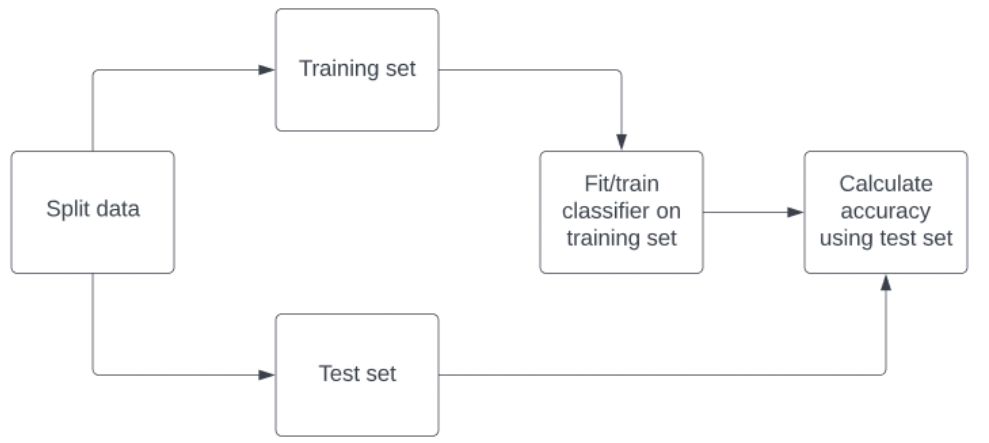

# ***Train/test split***

It is best to ensure the test set reflects the proportion of labels in data.
  * So if outcome '0' occurs 10% and '1' occurs 90%
    * Then 10% of labels in training and testing splits should represent '0'.
      * Use the keyword argument **`stratify=y`**.

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)

# Check Accuracy
print(knn.score(X_test, y_test))

0.854


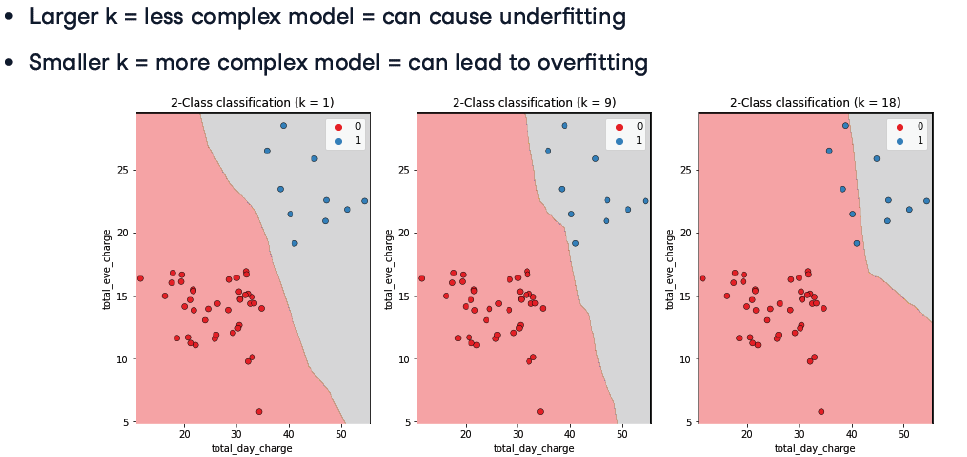



# ***Model complexity and over/underfitting***

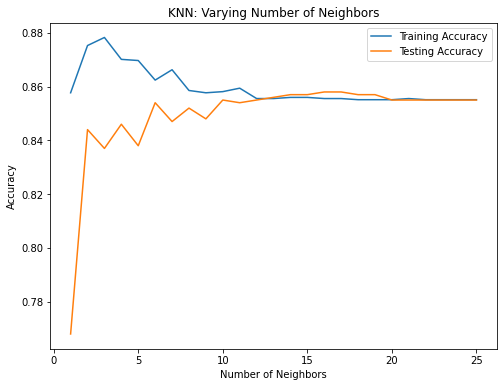

In [23]:
train_accuracies = {}
test_accuracies = {}
neighbors = np.arange(1, 26)

for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)

plt.figure(figsize=(8, 6))
plt.title("KNN: Varying Number of Neighbors")
plt.plot(neighbors, list(train_accuracies.values()), label="Training Accuracy")
plt.plot(neighbors, list(test_accuracies.values()), label="Testing Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()

จากรูปจะเห็นว่าเมื่อ k > 16 หรือ 17 ก็จะมีความแม่นยำลดลง

### ***Train/test split + computing accuracy***

Now that you have learned about the importance of splitting your data into training and test sets, it's time to practice doing this on the `churn_df` dataset!

NumPy arrays have been created for you containing the features as `X` and the target variable as `y`. You will split them into training and test sets, fit a KNN classifier to the training data, and then compute its accuracy on the test data using the **`.score()`** method.

* Import **`train_test_split`** from **`sklearn.model_selection`**.
* Split `X` and `y` into training and test sets, setting **`test_size`** equal to 20%, **`random_state`** to `42`, and ensuring the target label proportions reflect that of the original dataset.
* Fit the model to the training data.
* Compute and print the model's accuracy for the test data.

In [26]:
# Import the module
from sklearn.model_selection import train_test_split

X = churn_df.drop("churn", axis=1).values
y = churn_df["churn"].values

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

0.8740629685157422


In a few lines of code you split a dataset, fit a KNN model, and found its accuracy to be 87%!

### ***Overfitting and underfitting***

Interpreting model complexity is a great way to evaluate performance when utilizing supervised learning. Your aim is to produce a model that can interpret the relationship between features and the target variable, as well as generalize well when exposed to new observations.

You will generate accuracy scores for the training and test sets using a KNN classifier with different `n_neighbor` values, which you will plot in the next exercise.

The training and test sets have been created from the `churn_df` dataset and preloaded as `X_train`, `X_test`, `y_train`, and `y_test`.

In addition, **`KNeighborsClassifier`** has been imported for you along with numpy as **`np`**.

* Create `neighbors` as a numpy array of values from `1` up to and including `12`.
* Instantiate a KNN classifier, with the number of neighbors equal to the `neighbor` iterator.
* Fit the model to the training data.
* Calculate accuracy scores for the training set and test set separately using the **`.score()`** method, and assign the results to the index of the `train_accuracies` and `test_accuracies` dictionaries, respectively.

In [27]:
# Create neighbors
neighbors = np.arange(1, 13)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:
  
    # Set up a KNN Classifier
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    
    # Fit the model
    knn.fit(X_train, y_train)
    
    # Compute accuracy
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)

print(neighbors, '\n', train_accuracies, '\n', test_accuracies)

[ 1  2  3  4  5  6  7  8  9 10 11 12] 
 {1: 1.0, 2: 0.9036009002250562, 3: 0.9114778694673669, 4: 0.8945986496624156, 5: 0.8953488372093024, 6: 0.8893473368342085, 7: 0.8885971492873218, 8: 0.8863465866466617, 9: 0.8870967741935484, 10: 0.8840960240060015, 11: 0.8874718679669917, 12: 0.8837209302325582} 
 {1: 0.7946026986506747, 2: 0.8605697151424287, 3: 0.8500749625187406, 4: 0.8695652173913043, 5: 0.8740629685157422, 6: 0.8650674662668666, 7: 0.8710644677661169, 8: 0.863568215892054, 9: 0.8725637181409296, 10: 0.8665667166416792, 11: 0.8710644677661169, 12: 0.8710644677661169}


Notice how training accuracy decreases as the number of neighbors initially gets larger, and vice versa for the testing accuracy? These scores would be much easier to interpret in a line plot, so let's produce a model complexity curve of these results.

# ***Visualizing model complexity***

Now you have calculated the accuracy of the KNN model on the training and test sets using various values of `n_neighbors`, you can create a model complexity curve to visualize how performance changes as the model becomes less complex!

The variables `neighbors`, `train_accuracies`, and `test_accuracies`, which you generated in the previous exercise, have all been preloaded for you. You will plot the results to aid in finding the optimal number of neighbors for your model.

* Add a title `"KNN: Varying Number of Neighbors"`.
* Plot the `.values()` method of `train_accuracies` on the y-axis against neighbors on the x-axis, with a label of `"Training Accuracy"`.
* Plot the `.values()` method of `test_accuracies` on the y-axis against `neighbors` on the x-axis, with a label of `"Testing Accuracy"`.

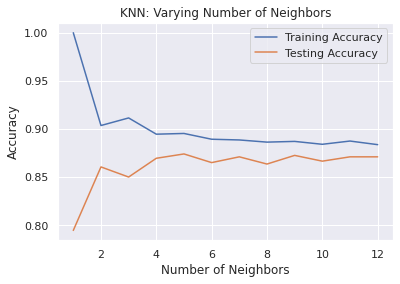

In [31]:
# Add a title
plt.title("KNN: Varying Number of Neighbors")

# Plot training accuracies
plt.plot(neighbors, list(train_accuracies.values()), label="Training Accuracy")

# Plot test accuracies
plt.plot(neighbors, list(test_accuracies.values()), label="Testing Accuracy")

plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

# Display the plot
plt.show()

See how training accuracy decreases and test accuracy increases as the number of neighbors gets larger. For the test set, accuracy peaks with 7 ไม่เหมือนกับผลบนดาต้าแคมพ์แบบเป๊ะๆ อะ neighbors, suggesting it is the optimal value for our model. Now let's explore regression models!

# ***Predicting blood glucose levels***

In [34]:
diabetes_df = pd.read_csv('diabetes_clean.csv')
X = diabetes_df.drop(columns="glucose").values
y = diabetes_df["glucose"].values

## ***One-variable regression***


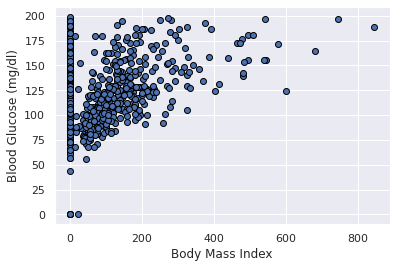

In [38]:
X_bmi = X[:, 3].reshape(-1, 1)
plt.scatter(X_bmi, y, edgecolor='black')
plt.ylabel("Blood Glucose (mg/dl)")
plt.xlabel("Body Mass Index")
plt.show()

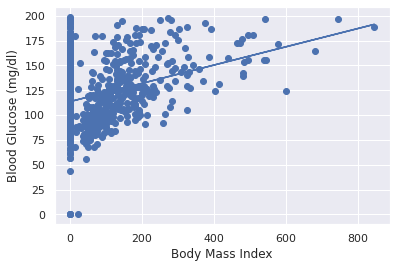

In [39]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_bmi, y)
predictions = reg.predict(X_bmi)
plt.scatter(X_bmi, y)
plt.plot(X_bmi, predictions)
plt.ylabel("Blood Glucose (mg/dl)")
plt.xlabel("Body Mass Index")
plt.show()

### ***Creating features***

In this chapter, you will work with a dataset called `sales_df`, which contains information on advertising campaign expenditure across different media types, and the number of dollars generated in sales for the respective campaign. The dataset has been preloaded for you. Here are the first two rows:

```
     tv        radio      social_media    sales
1    13000.0   9237.76    2409.57         46677.90
2    41000.0   15886.45   2913.41         150177.83
```

You will use the advertising expenditure as features to predict sales values, initially working with the `"radio"` column. However, before you make any predictions you will need to create the feature and target arrays, reshaping them to the correct format for scikit-learn.

* Create `X`, an array of the values from the `sales_df` DataFrame's `"radio"` column.
* Create `y`, an array of the values from the `sales_df` DataFrame's `"sales"` column.
* Reshape `X` into a two-dimensional NumPy array.
* Print the shape of `X` and `y`.

In [45]:
sales_df = pd.read_csv('advertising_and_sales_clean.csv').drop(columns='Unnamed: 0')
sales_df.dropna(inplace=True)

# Create X from the radio column's values
X = sales_df['radio'].values

# Create y from the sales column's values
y = sales_df['sales'].values

# Reshape X
X = X.reshape(-1, 1)

# Check the shape of the features and targets
print(X.shape, y.shape)

(4546, 1) (4546,)


See that there are 4,546 values in both arrays? Now let's build a linear regression model!

### ***Building a linear regression model***

Now you have created your feature and target arrays, you will train a linear regression model on all feature and target values.

As the goal is to assess the relationship between the feature and target values there is no need to split the data into training and test sets.

`X` and `y` have been preloaded for you as follows:

```
y = sales_df["sales"].values
X = sales_df["radio"].values.reshape(-1, 1)
```

* Import `LinearRegression`.
* Instantiate a linear regression model.
* Predict sales values using `X`, storing as `predictions`.

In [46]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Create the model
reg = LinearRegression()

# Fit the model to the data
reg.fit(X, y)

# Make predictions
predictions = reg.predict(X)

print(predictions[:5])

[ 95491.17119147 117829.51038393 173423.38071499 291603.11444202
 111137.28167129]


See how sales values for the first five predictions range from $95,000 to over $290,000. Let's visualize the model's fit.

### ***Visualizing a linear regression model***

Now you have built your linear regression model and trained it using all available observations, you can visualize how well the model fits the data. This allows you to interpret the relationship between radio advertising expenditure and sales values.

The variables `X`, an array of radio values, `y`, an array of sales values, and predictions, an array of the model's predicted values for y given X, have all been preloaded for you from the previous exercise.

* Create a scatter plot visualizing `y` against `X`, with observations in blue.
* Draw a red line plot displaying the predictions against `X`.


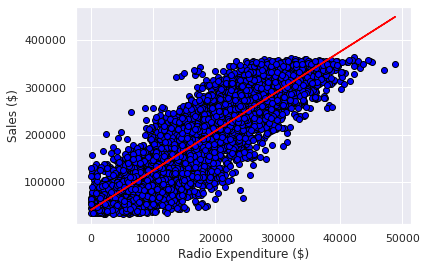

In [47]:
# Create scatter plot
plt.scatter(X, y, color="blue", edgecolor='black')

# Create line plot
plt.plot(X, predictions, color="red")
plt.xlabel("Radio Expenditure ($)")
plt.ylabel("Sales ($)")
plt.show()

The model nicely captures a near-perfect linear correlation between radio advertising expenditure and sales! Now let's take a look at what is going on under the hood to calculate this relationship.

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
diabetes_df = pd.read_csv('diabetes_clean.csv')
X = diabetes_df.drop(columns="glucose").values
y = diabetes_df["glucose"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)

# ***R-squared in scikit-learn*** 

ค่าต่างจากสไลด์เล็กน้อย

In [50]:
reg_all.score(X_test, y_test)

0.28280468810375115

# ***RMSE in scikit-learn***

ค่าต่างจากสไลด์เล็กน้อย

In [51]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred, squared=False)

26.341459582232265

### ***Fit and predict for regression***

Now you have seen how linear regression works, your task is to create a multiple linear regression model using all of the features in the `sales_df` dataset, which has been preloaded for you. As a reminder, here are the first two rows:

```
     tv        radio      social_media    sales
1    13000.0   9237.76    2409.57         46677.90
2    41000.0   15886.45   2913.41         150177.83
```

You will then use this model to predict sales based on the values of the test features.

`LinearRegression` and `train_test_split` have been preloaded for you from their respective modules.

* Create `X`, an array containing values of all features in `sales_df`, and `y`, containing all values from the `"sales"` column.
* Instantiate a linear regression model.
* Fit the model to the training data.
* Create `y_pred`, making predictions for sales using the test features.

In [59]:
sales_df = pd.read_csv('advertising_and_sales_clean.csv').drop(columns=['Unnamed: 0', 'influencer'])
sales_df.dropna(inplace=True)

# Create X and y arrays
X = sales_df.drop("sales", axis=1).values
y = sales_df["sales"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate the model
reg = LinearRegression()

# Fit the model to the data
reg.fit(X_train, y_train)

# Make predictions
y_pred = reg.predict(X_test)
print("Predictions: {}, Actual Values: {}".format(y_pred[:2], y_test[:2]))

Predictions: [53176.66154234 70996.19873235], Actual Values: [55261.28 67574.9 ]


The first two predictions appear to be within around 5% of the actual values from the test set!

### ***Regression performance***

Now you have fit a model, `reg`, using all features from `sales_df`, and made predictions of `sales` values, you can evaluate performance using some common regression metrics.

The variables `X_train`, `X_test`, `y_train`, `y_test`, and `y_pred`, along with the fitted model, `reg`, all from the last exercise, have been preloaded for you.

Your task is to find out how well the features can explain the variance in the target values, along with assessing the model's ability to make predictions on unseen data.

* Import `mean_squared_error`.
* Calculate the model's R-squared score by passing the test feature values and the test target values to an appropriate method.
* Calculate the model's root mean squared error using `y_test` and `y_pred`.


In [54]:
# Import mean_squared_error
from sklearn.metrics import mean_squared_error

# Compute R-squared
r_squared = reg.score(X_test, y_test)

# Compute RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Print the metrics
print("R^2: {}".format(r_squared))
print("RMSE: {}".format(rmse))

R^2: 0.9990152104759368
RMSE: 2944.4331996001


The features explain 99.9% of the variance in sales values.

# ***Cross-validation in scikit-learn***



In [56]:
from sklearn.model_selection import cross_val_score, KFold

kf = KFold(n_splits=6, shuffle=True, random_state=42)
reg = LinearRegression()
cv_results = cross_val_score(reg, X, y, cv=kf)
print(cv_results)

[0.26207548 0.28228176 0.41203082 0.23785884 0.41634629 0.30398869]


### ***Cross-validation for R-squared***

Cross-validation is a vital approach to evaluating a model. It maximizes the amount of data that is available to the model, as the model is not only trained but also tested on all of the available data.

In this exercise, you will build a linear regression model, then use 6-fold cross-validation to assess its accuracy for predicting sales using social media advertising expenditure. You will display the individual score for each of the six-folds.

The `sales_df` dataset has been split into `y` for the target variable, and `X` for the features, and preloaded for you. `LinearRegression` has been imported from `sklearn.linear_model`.

* Import `KFold` and `cross_val_score`.
* Create `kf` by calling `KFold()`, setting the number of splits to six, `shuffle` to `True`, and setting a seed of `5`.
* Perform cross-validation using `reg` on `X` and `y`, passing `kf` to `cv`.


In [60]:
from sklearn.model_selection import cross_val_score, KFold

sales_df = pd.read_csv('advertising_and_sales_clean.csv').drop(columns=['Unnamed: 0', 'influencer'])
sales_df.dropna(inplace=True)

# Create X and y arrays
X = sales_df.drop("sales", axis=1).values
y = sales_df["sales"].values

# Create a KFold object
kf = KFold(n_splits=6, shuffle=True, random_state=5)

reg = LinearRegression()

# Compute 6-fold cross-validation scores
cv_scores = cross_val_score(reg, X, y, cv=kf)

# Print scores
print(cv_scores)

[0.99894062 0.99909245 0.9990103  0.99896344 0.99889153 0.99903953]


บนดาต้าแคมพ์ต้องรันอะไรสักอย่างเบื้องหลัง ข้างบนคือ กด run code ก็ได้ตัวเลขพวกนี้เหมือนกัน แต่พอกด submit แล้วตัวเลขไม่เหมือน

Notice how R-squared for each fold ranged between 0.9988 and 0.9990? By using cross-validation, we can see how performance varies depending on how the data is split.

### ***Analyzing cross-validation metrics***

Now you have performed cross-validation, it's time to analyze the results.

You will display the mean, standard deviation, and 95% confidence interval for `cv_results`, which has been preloaded for you from the previous exercise.

* Calculate and print the mean of the results.
* Calculate and print the standard deviation of `cv_results`.
* Display the 95% confidence interval for your results using `np.quantile()`.

In [64]:
cv_results = cv_scores 

# Print the mean
print(np.mean(cv_results))

# Print the standard deviation
print(np.std(cv_results))

# Print the 95% confidence interval
print(np.quantile(cv_results, [0.025, 0.975]))

0.9989896443678249
6.608118371529651e-05
[0.99889767 0.99908583]


# ***Ridge Regression***

* Loss function = OLS loss function + \alpha\sum_{i=1}^na_i^2
* Choose $\alpha$ (similar to picking $k$ in KNN)
  * α controls model complexity
  * α = 0 = OLS (Can lead to overfitting)
  * Very high α: Can lead to underfitting

In [3]:
from sklearn.linear_model import Ridge

diabetes_df = pd.read_csv('diabetes_clean.csv')
X = diabetes_df.drop(columns="glucose").values
y = diabetes_df["glucose"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scores = []
for alpha in [0.1, 1.0, 10.0, 100.0, 1000.0]:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    scores.append(ridge.score(X_test, y_test))
print(scores)

[0.2828466623222221, 0.28320633574804777, 0.2853000732200006, 0.26423984812668133, 0.19292424694100963]


# ***Lasso regression***

Loss function = OLS loss function + $\alpha\sum_{i=1}^n|a_i|$

[0.2831114455475573, 0.29795609755827845, 0.17989838789273893, 0.18127361610181125, 0.15679544303617987]


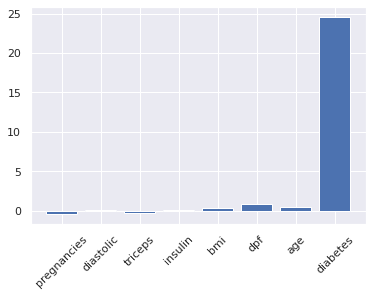

In [7]:
from sklearn.linear_model import Lasso

diabetes_df = pd.read_csv('diabetes_clean.csv')
X = diabetes_df.drop(columns="glucose").values
y = diabetes_df["glucose"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
names = diabetes_df.drop("glucose", axis=1).columns

scores = []
for alpha in [0.01, 1.0, 10.0, 20.0, 50.0]:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    lasso_pred = lasso.predict(X_test)
    scores.append(lasso.score(X_test, y_test))
print(scores)

lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X, y).coef_
plt.bar(names, lasso_coef)
plt.xticks(rotation=45)
plt.show()

### ***Regularized regression: Ridge***

Ridge regression performs regularization by computing the squared values of the model parameters multiplied by alpha and adding them to the loss function.

In this exercise, you will fit ridge regression models over a range of different `alpha` values, and print their  scores. You will use all of the features in the `sales_df` dataset to predict `"sales"`. The data has been split into `X_train`, `X_test`, `y_train`, `y_test` for you.

A variable called `alphas` has been provided as a list containing different alpha values, which you will loop through to generate scores.

* Import `Ridge`.
* Instantiate `Ridge`, setting `alpha` equal to `alpha`.
* Fit the model to the training data.
* Calculate the $R^2$ score for each iteration of `ridge`.

In [9]:
from sklearn.linear_model import Ridge

sales_df = pd.read_csv('advertising_and_sales_clean.csv').drop(columns=['Unnamed: 0', 'influencer'])
sales_df.dropna(inplace=True)

# Create X and y arrays
X = sales_df.drop("sales", axis=1).values
y = sales_df["sales"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

alphas = [0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
ridge_scores = []
for alpha in alphas:
  
  # Create a Ridge regression model
  ridge = Ridge(alpha=alpha)
  
  # Fit the data
  ridge.fit(X_train, y_train)
  
  # Obtain R-squared
  score = ridge.score(X_test, y_test)
  ridge_scores.append(score)
print(ridge_scores)

[0.9990152104759369, 0.9990152104759373, 0.9990152104759419, 0.9990152104759871, 0.9990152104764387, 0.9990152104809561]


The scores don't appear to change much as `alpha` increases, which is indicative of how well the features explain the variance in the target— even by heavily penalizing large coefficients, underfitting does not occur!

### ***Lasso regression for feature importance***


Fit a lasso regression model to the `sales_df` data and plot the model's coefficients.

The feature and target variable arrays have been pre-loaded as `X` and `y`, along with `sales_columns`, which contains the dataset's feature names.

* Import `Lasso` from `sklearn.linear_model`.
* Instantiate a `Lasso` regressor with an `alpha` of `0.3`.
* Fit the model to the data.
* Compute the model's coefficients, storing as `lasso_coef`.

[ 3.56256962 -0.00397035  0.00496385]


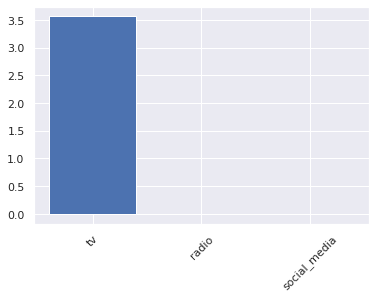

In [11]:
from sklearn.linear_model import Lasso

sales_df = pd.read_csv('advertising_and_sales_clean.csv').drop(columns=['Unnamed: 0', 'influencer'])
sales_df.dropna(inplace=True)
sales_columns = ['tv', 'radio', 'social_media']

# Create X and y arrays
X = sales_df.drop("sales", axis=1).values
y = sales_df["sales"].values

# Instantiate a lasso regression model
lasso = Lasso(alpha=0.3)

# Fit the model to the data
lasso.fit(X, y)

# Compute and print the coefficients
lasso_coef = lasso.fit(X, y).coef_
print(lasso_coef)
plt.bar(sales_columns, lasso_coef)
plt.xticks(rotation=45)
plt.show()

See how the figure makes it clear that expenditure on TV advertising is the most important feature in the dataset to predict sales values!

# ***Class imbalance***

* Classicfication for predicting fraudulent bank transactions
  * 99% of transactions are legitimate; 1% are fraudulent
* Could build a classifier that predicts NONE of the transactions are fraudulent
  * 99% accurate!
* But terrible at actually predicting fraudulent transactions
* Fails at its original purpose

# ***Confusion matrix***

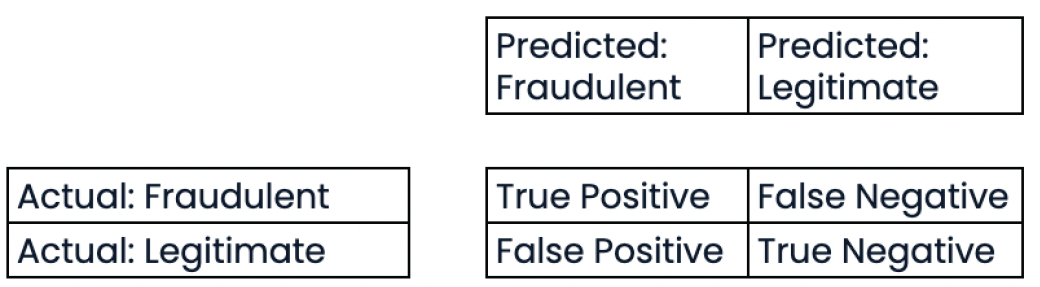



## ***Accuracy***

$$\frac{tp + tn}{tp + tn + fp + fn}$$

## ***Precision***
* ในบรรดาสิ่งที่ทำนายออกมาว่าเป็นบวก ร้อยละเท่าไหร่ที่ทำนายได้ถูกต้อง

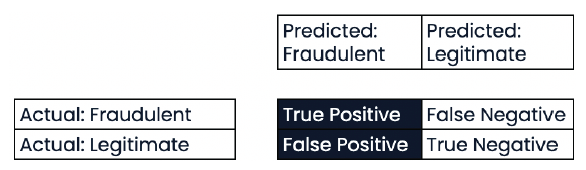

$$\frac{tp}{tp + fp}$$

# ***Recall***

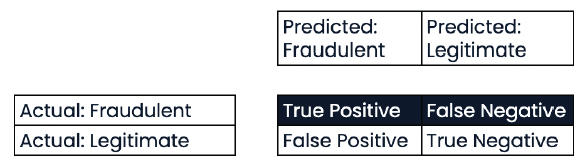

* ในบรรดาสิ่งที่ของจริงเป็นบวก ร้อยละเท่าไหร่ที่ทำนายออกมาได้ถูกต้อง

$$\frac{tp}{tp + fn}$$

# ***F1 score***

$$2\times\frac{\text{precision}\times\text{recall}}{\text{precision} + \text{recall}}$$

# ***Classification report***

In [5]:
churn_df = pd.read_csv('telecom_churn_clean.csv').drop(columns='Unnamed: 0')
X = churn_df.drop(columns='churn').values
y = churn_df["churn"].values

knn = KNeighborsClassifier(n_neighbors=7)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1126   12]
 [ 158   38]]
              precision    recall  f1-score   support

           0       0.88      0.99      0.93      1138
           1       0.76      0.19      0.31       196

    accuracy                           0.87      1334
   macro avg       0.82      0.59      0.62      1334
weighted avg       0.86      0.87      0.84      1334



เนื่องจากในกลุ่มตัวอย่างที่ของจริงเป็น `churn=1` แต่ค่า recall ออกมาแค่ 0.19 แปลว่าค่า recall ของกลุ่มนี้แย่มาก

### ***Deciding on a primary metric***

As you have seen, several metrics can be useful to evaluate the performance of classification models, including accuracy, precision, recall, and F1-score.

You will be provided with three different classification problems, and your task is to select the problem where precision is best suited as the primary metric.

* A model predicting the presence of cancer as the positive class.
  * This model should minimize the number of false negatives, so recall is a more appropriate metric.

* A classifier predicting the positive class of a computer program containing malware.
  * To avoid installing malware, false negatives should be minimized, hence recall or F1-score are better metrics for this model.

* *A model predicting if a customer is a high-value lead for a sales team with limited capacity.*

* ***จากที่สังเกต ถ้าสิ่งที่ทำนายเป็นบวก คือสิ่งที่ไม่ดี (เช่น มะเร็ง ไวรัสคอมพิวเตอร์) ต้องใช้ค่า recall***
* ***ถ้าสิ่งที่ทำนายเป็นบวก คือสิ่งที่ดี (เช่น ศักยภาพแรงงาน) ต้องใช้ค่า precision***

### ***Assessing a diabetes prediction classifier***

In this chapter you'll work with the `diabetes_df` dataset introduced previously.

The goal is to predict whether or not each individual is likely to have diabetes based on the features body mass index (BMI) and age (in years). Therefore, it is a binary classification problem. A target value of `0` indicates that the individual does not have diabetes, while a value of `1` indicates that the individual does have diabetes.

`diabetes_df` has been preloaded for you as a pandas DataFrame and split into `X_train`, `X_test`, `y_train`, and `y_test`. In addition, a `KNeighborsClassifier()` has been instantiated and assigned to `knn`.

You will fit the model, make predictions on the test set, then produce a confusion matrix and classification report.

* Import `confusion_matrix` and `classification_report`.
* Fit the model to the training data.
* Predict the labels of the test set, storing the results as `y_pred`.
* Compute and print the confusion matrix and classification report for the test labels versus the predicted labels.

In [9]:
diabetes_df = pd.read_csv('diabetes_clean.csv')
X = diabetes_df.drop(columns="diabetes").values
y = diabetes_df["diabetes"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.metrics import classification_report, confusion_matrix

knn = KNeighborsClassifier(n_neighbors=6)

# Fit the model to the training data
knn.fit(X_train, y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[124  27]
 [ 42  38]]
              precision    recall  f1-score   support

           0       0.75      0.82      0.78       151
           1       0.58      0.47      0.52        80

    accuracy                           0.70       231
   macro avg       0.67      0.65      0.65       231
weighted avg       0.69      0.70      0.69       231



The model produced 124 true positives, 38 true negatives, 27 false negatives, and 42 false positives. The classification report shows a better F1-score for the zero class, which represents individuals who do not have diabetes.

In [11]:
from sklearn.linear_model import LogisticRegression

churn_df = pd.read_csv('telecom_churn_clean.csv').drop(columns='Unnamed: 0')
X = churn_df.drop(columns='churn').values
y = churn_df["churn"].values

logreg = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


# ***Predicting probabilities***



In [13]:
y_pred_probs = logreg.predict_proba(X_test)[:, 1] 
print(y_pred_probs[0]) # ความน่าจะเป็นที่ ค่าตัวอย่างแรกจะ churn

0.11081844967748615


# ***The ROC curve***

## ***Threshold = 0***

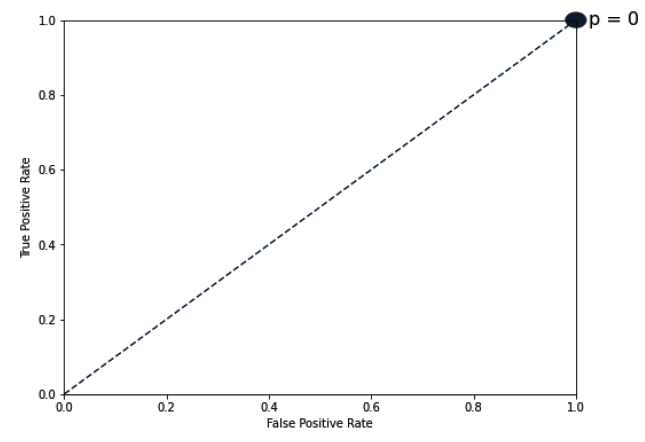

* ทำนายทุกค่าออกมาเป็น 1 หมด นั่นหมายความว่า ไม่ว่าของจริงจะเป็นอะไร ก็จะทำนายออกมาเป็นบวกหมด นั่นคือ 
  * ถ้าของจริงเป็นบวก ก็จะถูกหมด 
  * ถ้าของจริงเป็นลบ ก็จะผิดหมด

## ***Threshold = 1***

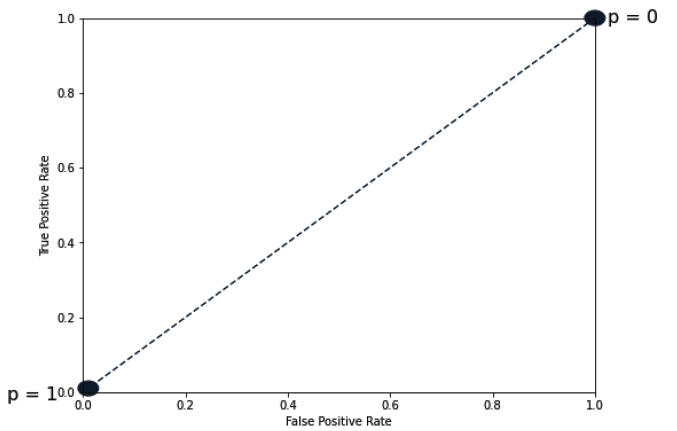

* ทำนายทุกค่าออกมาเป็น 0 หมด
  * ไม่มีค่า positive
    * tp = fp = 0

## ***Varying Threshold***

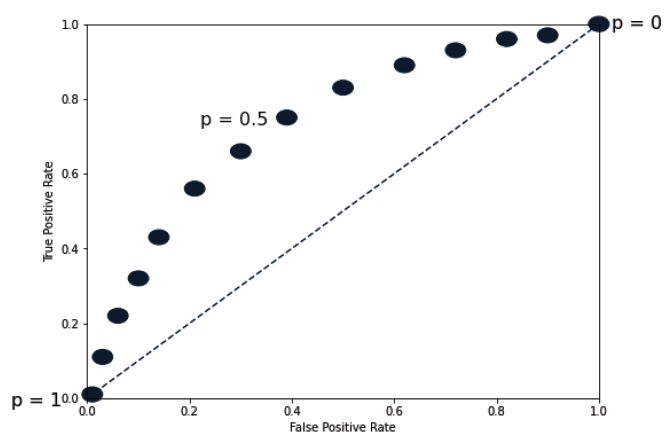

# ***Plotting the ROC curve***


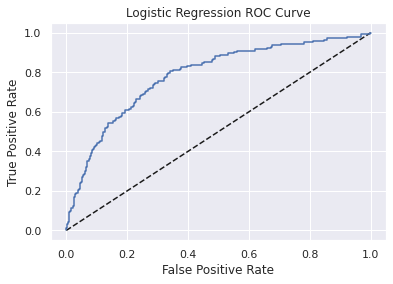

In [18]:
from sklearn.metrics import roc_curve

# fpr false positive rate
# tpr true positive rate

fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

# ***ROC AUC***

In [19]:
from sklearn.metrics import roc_auc_score

print(roc_auc_score(y_test, y_pred_probs))

0.7822457589085361


### ***Building a logistic regression model***

In this exercise, you will build a logistic regression model using all features in the `diabetes_df` dataset. The model will be used to predict the probability of individuals in the test set having a diabetes diagnosis.

The `diabetes_df` dataset has been split into `X_train`, `X_test`, `y_train`, and `y_test`.

* Import `LogisticRegression`.
* Instantiate a logistic regression model, `logreg`.
* Fit the model to the training data.
* Predict the probabilities of each individual in the test set having a diabetes diagnosis, storing the array of positive probabilities as `y_pred_probs`.

In [23]:
diabetes_df = pd.read_csv('diabetes_clean.csv')
X = diabetes_df.drop(columns="diabetes").values
y = diabetes_df["diabetes"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.linear_model import LogisticRegression

# Instantiate the model
logreg = LogisticRegression()

# Fit the model
logreg.fit(X_train, y_train)

# Predict probabilities
y_pred_probs = logreg.predict_proba(X_test)[:, 1]
y_pred = logreg.predict(X_test)
print(y_pred_probs[:10])

[0.2655103  0.18336547 0.12119599 0.15613563 0.4961128  0.44582234
 0.01359236 0.61646124 0.55640546 0.79311866]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Notice how the probability of a diabetes diagnosis for the first 10 individuals in the test set ranges from 0.01 to 0.79. Now let's plot the ROC curve to visualize performance using different thresholds.

### ***The ROC curve***

Now you have built a logistic regression model for predicting diabetes status, you can plot the ROC curve to visualize how the true positive rate and false positive rate vary as the decision threshold changes.

The test labels, `y_test`, and the predicted probabilities of the test features belonging to the positive class, `y_pred_probs`, have been preloaded for you.

You will create a ROC curve and then interpret the results.

* Import `roc_curve`.
* Calculate the ROC curve values, using `y_test` and `y_pred_probs`, and unpacking the results into `fpr`, `tpr`, and `thresholds`.
* Plot true positive rate against false positive rate.

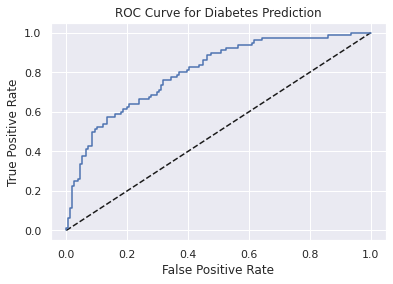

In [21]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Diabetes Prediction')
plt.show()

The ROC curve is above the dotted line, so the model performs better than randomly guessing the class of each observation.

### ***ROC AUC***

The ROC curve you plotted in the last exercise looked promising.

Now you will compute the area under the ROC curve, along with the other classification metrics you have used previously.

The confusion_matrix and `classification_report` functions have been preloaded for you, along with the `logreg` model you previously built, plus `X_train`, `X_test`, `y_train`, `y_test`. Also, the model's predicted test set labels are stored as `y_pred`, and probabilities of test set observations belonging to the positive class stored as `y_pred_probs`.

* A `knn` model has also been created and the performance metrics printed in the console, so you can compare the `roc_auc_score`, `confusion_matrix`, and `classification_report` between the two models.

* Import `roc_auc_score`.
* Calculate and print the ROC AUC score, passing the test labels and the predicted positive class probabilities.
* Calculate and print the confusion matrix.
* Call `classification_report()`.

In [24]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, y_pred_probs))

# Calculate the confusion matrix
print(confusion_matrix(y_test, y_pred))

# Calculate the classification report
print(classification_report(y_test, y_pred))

0.8002483443708608
[[121  30]
 [ 30  50]]
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       151
           1       0.62      0.62      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



Did you notice that logistic regression performs better than the KNN model across all the metrics you calculated? A ROC AUC score of 0.8002 means this model is 60% better than a chance model at correctly predicting labels! scikit-learn makes it easy to produce several classification metrics with only a few lines of code.

# ***Grid search cross-validation***

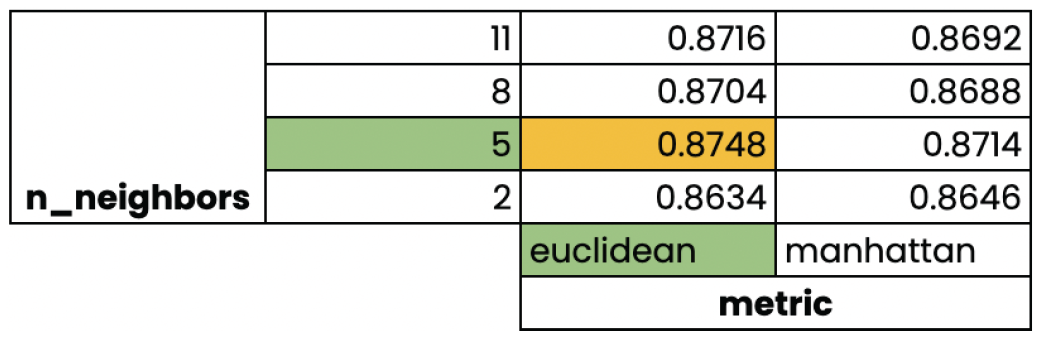

In [29]:
from sklearn.model_selection import GridSearchCV

churn_df = pd.read_csv('telecom_churn_clean.csv').drop(columns='Unnamed: 0')
X = churn_df.drop(columns='churn').values
y = churn_df["churn"].values

kf = KFold(n_splits=5, shuffle=True, random_state=42)
param_grid = {'alpha': np.linspace(0.0001, 1, 10), 'solver': ["sag", "lsqr"]}
ridge = Ridge()
ridge_cv = GridSearchCV(ridge, param_grid, cv=kf)
ridge_cv.fit(X_train, y_train)
print(ridge_cv.best_params_, ridge_cv.best_score_)

{'alpha': 1.0, 'solver': 'sag'} 0.29586629466310665


# ***RandomizedSearchCV***

In [30]:
from sklearn.model_selection import RandomizedSearchCV

kf = KFold(n_splits=5, shuffle=True, random_state=42)
param_grid = {'alpha': np.linspace(0.0001, 1, 10), 'solver': ["sag", "lsqr"]}
ridge = Ridge()
ridge_cv = RandomizedSearchCV(ridge, param_grid, cv=kf, n_iter=2)
ridge_cv.fit(X_train, y_train)
print(ridge_cv.best_params_, ridge_cv.best_score_)
test_score = ridge_cv.score(X_test, y_test)
print(test_score)

{'solver': 'sag', 'alpha': 0.7778} 0.2958562403415315
0.19755780185112604


### ***Hyperparameter tuning with GridSearchCV***

Now you have seen how to perform grid search hyperparameter tuning, you are going to build a lasso regression model with optimal hyperparameters to predict blood glucose levels using the features in the `diabetes_df` dataset.

`X_train`, `X_test`, `y_train`, and `y_test` have been preloaded for you. A `KFold()` object has been created and stored for you as `kf`, along with a lasso regression model as `lasso`.

* Import `GridSearchCV`.
* Set up a parameter grid for `"alpha"`, using `np.linspace()` to create `20` evenly spaced values ranging from `0.00001` to `1`.
* Call `GridSearchCV()`, passing `lasso`, the parameter grid, and setting cv equal to `kf`.
* Fit the grid search object to the training data to perform a cross-validated grid search.

In [32]:
diabetes_df = pd.read_csv('diabetes_clean.csv')
X = diabetes_df.drop(columns="glucose").values
y = diabetes_df["glucose"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
lasso = Lasso()
kf = KFold(n_splits=5, shuffle=True, random_state=42)

from sklearn.model_selection import GridSearchCV

# Set up the parameter grid
param_grid = {"alpha": np.linspace(0.00001, 1, 20)}

# Instantiate lasso_cv
lasso_cv = GridSearchCV(lasso, param_grid, cv=kf)

# Fit to the training data
lasso_cv.fit(X_train, y_train)
print("Tuned lasso paramaters: {}".format(lasso_cv.best_params_))
print("Tuned lasso score: {}".format(lasso_cv.best_score_))

Tuned lasso paramaters: {'alpha': 1e-05}
Tuned lasso score: 0.335063599558501


Unfortunately, the best model only has an R-squared score of 0.34, highlighting that using the optimal hyperparameters does not guarantee a high performing model!

### ***Hyperparameter tuning with RandomSearchCV***

As you saw, `GridSearchCV` can be computationally expensive, especially if you are searching over a large hyperparameter space. In this case, you can use `RandomizedSearchCV`, which tests a fixed number of hyperparameter settings from specified probability distributions.

Training and test sets from `diabetes_df` have been pre-loaded for you as `X_train`, `X_test`, `y_train`, and `y_test`, where the target is `"diabetes"`. A logistic regression model has been created and stored as `logreg`, as well as a `KFold` variable stored as `kf`.

You will define a range of hyperparameters and use `RandomizedSearchCV`, which has been imported from `sklearn.model_selection`, to look for optimal hyperparameters from these options.

* Create `params`, adding `"l1"` and `"l2"` as penalty values, setting `C` to a range of `50` float values between `0.1` and `1.0`, and `class_weight` to either `"balanced"` or a dictionary containing `0:0.8, 1:0.2`.

* Create the Randomized Search CV object, passing the model and the parameters, and setting `cv` equal to `kf`.

* Fit `logreg_cv` to the training data.

In [16]:
diabetes_df = pd.read_csv('diabetes_clean.csv')
X = diabetes_df.drop(columns="diabetes").values
y = diabetes_df["diabetes"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
logreg = LogisticRegression(max_iter=10000)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Create the parameter space
params = {"penalty": ["l2"], # จะเป็น ["l1", "l2"] ก็ได้ แต่จะมี warning message
         "tol": np.linspace(0.0001, 1.0, 50),
         "C": np.linspace(0.1, 1.0, 50),
         "class_weight": ["balanced", {0:0.8, 1:0.2}]}

# Instantiate the RandomizedSearchCV object
logreg_cv = RandomizedSearchCV(logreg, params, cv=kf, random_state=42)

# Fit the data to the model
logreg_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Best Accuracy Score: {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'tol': 0.5306591836734694, 'penalty': 'l2', 'class_weight': 'balanced', 'C': 0.9081632653061225}
Tuned Logistic Regression Best Accuracy Score: 0.7634129456559363


### ***CV มีปัญหาเรื่องการลู่เข้ามากๆ ไม่รู้จะแก้ยังไง ถ้าไม่ใส่ `n_jobs` เพิ่มเข้าไป บางทีคือ ผลไม่ออกเลย***

### ***ด้านบน แก้โดยใส่ `max_iter=10000` เพิ่มเข้าไปใน `LogisticRegression()`***

Even without exhaustively trying every combination of hyperparameters, the model has an accuracy of over 70% on the test set. (Accuracy score of 0.7634).

# ***Dealing with categorical features***

* scikit-learn will not accept categorical features by default
* Need to convert categorical features into numeric values
* Convert to binary features called dummy variables

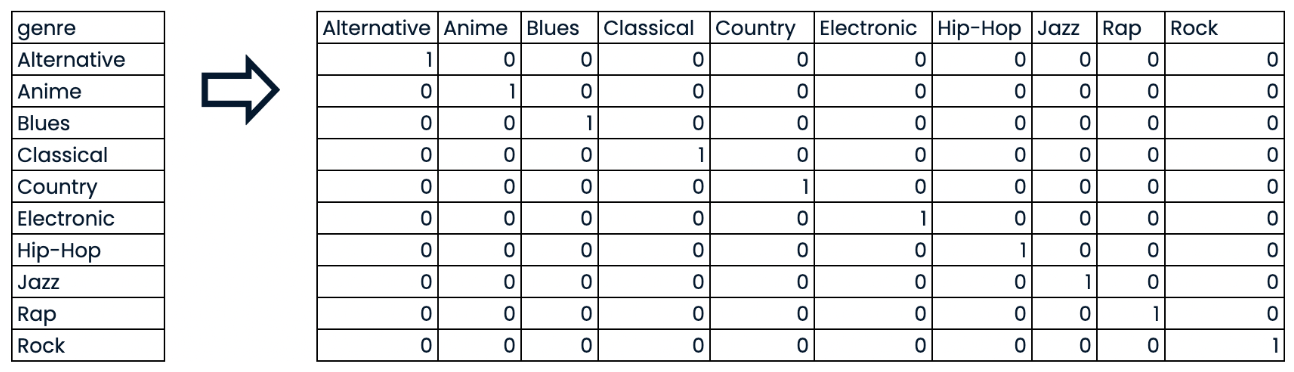

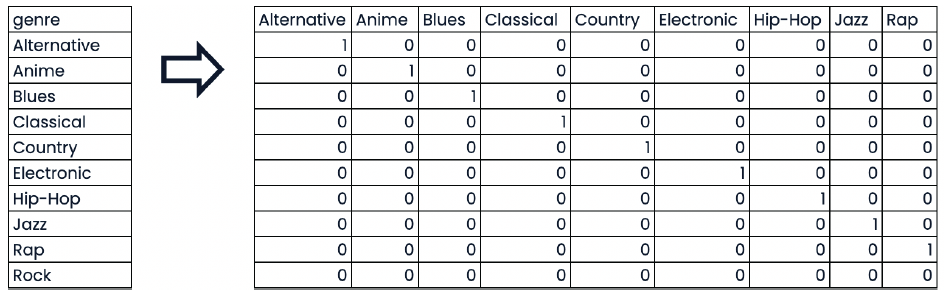

ต้องเอาออกมาคอลัมน์นึง ไม่งั้นบางทีมีปัญหา
  * ใช้ **`drop_first=True`**

# ***Dealing with categorical features in Python***

* scikit-learn: **`OneHotEncoder()`**
* pandas: **`get_dummies()`**

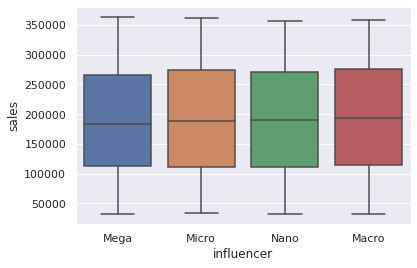

In [23]:
ad = pd.read_csv('advertising_and_sales_clean.csv').drop(columns='Unnamed: 0')
sns.boxplot(data=ad, x='influencer', y='sales')
plt.show()

In [31]:
ad_dummies = pd.get_dummies(ad['influencer'], drop_first=True)
display(ad.head(), ad_dummies.head())

,tv,radio,social_media,influencer,sales
0,16000.0,6566.23,2907.98,Mega,54732.76
1,13000.0,9237.76,2409.57,Mega,46677.90
2,41000.0,15886.45,2913.41,Mega,150177.83
3,83000.0,30020.03,6922.30,Mega,298246.34
4,15000.0,8437.41,1406.00,Micro,56594.18


,Mega,Micro,Nano
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,0,1,0


In [32]:
ad = pd.concat([ad, ad_dummies], axis=1).drop(columns='influencer')
ad.head()

,tv,radio,social_media,sales,Mega,Micro,Nano
0,16000.0,6566.23,2907.98,54732.76,1,0,0
1,13000.0,9237.76,2409.57,46677.90,1,0,0
2,41000.0,15886.45,2913.41,150177.83,1,0,0
3,83000.0,30020.03,6922.30,298246.34,1,0,0
4,15000.0,8437.41,1406.00,56594.18,0,1,0


# ***Linear regression with dummy variables***

In [44]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression

ad = ad.dropna()
X = ad.drop("sales", axis=1).values
y = ad["sales"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

linreg = LinearRegression()
linreg_cv = cross_val_score(linreg, X_train, y_train, cv=kf, scoring="neg_mean_squared_error", error_score='raise')

# RMSE
print(np.sqrt(-linreg_cv)) # ทำไม linreg_cv ติดลบ ?

[2884.90350807 3017.42522424 3019.89299561 2920.56457442 2917.55203135]


* เพราะใช้ `scoring="neg_mean_squared_error"` เนื่องจาก Cross Validation จะเอาคะแนนสูงสุดมาให้ (แต่ MSE ยิ่งน้อยยิ่งดี) ก็เลยต้องใช้ค่าติดลบ

* เนื่องจาก `ad['sales'].std() = 93,019` an average RMSE of approximately `2,952` is lower than the standard deviation of the target variable (sales), suggesting the model is reasonably accurate.

# ***Dropping missing data***

In [4]:
music_df = pd.read_csv('music_clean.csv').drop(columns='Unnamed: 0')
music_df = music_df.dropna(subset=["genre", "popularity", "loudness", "liveness", "tempo"])
print(music_df.isna().sum().sort_values())

popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
genre               0
dtype: int64


# ***Imputing values***

* Common to use the **mean**
* Can also use the **median**, or another value
* For categorical values, we typically use the most frequent value - the **mode**
* Must split our data first, to avoid ***data leakage***

# ***Imputation with scikit-learn***

In [ ]:
from sklearn.impute import SimpleImputer

imp_cat = SimpleImputer(strategy="most_frequent")
X_train_cat = imp_cat.fit_transform(X_train) # .fit_transform ใช้กับ train
X_test_cat = imp_cat.transform(X_test) # .transform ใช้กับ test

# ***Imputing within a pipeline***

In [5]:
from sklearn.pipeline import Pipeline

music_df = music_df.dropna(subset=["genre", "popularity", "loudness", "liveness", "tempo"])
music_df["genre"] = np.where(music_df["genre"] == "Rock", 1, 0) # 1 if Rock
X = music_df.drop("genre", axis=1).values
y = music_df["genre"].values

# Pipeline
steps = [[("imputation", SimpleImputer()), ("logistic_regression", LogisticRegression())]
pipeline = Pipeline(steps)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
pipeline.fit(X_train, y_train)
pipeline.score(X_test, y_test)

# ***Dropping missing data***

Over the next three exercises, you are going to tidy the `music_df` dataset. You will create a pipeline to impute missing values and build a KNN classifier model, then use it to predict whether a song is of the `"Rock"` genre.

In this exercise specifically, you will drop missing values accounting for less than 5% of the dataset, and convert the `"genre"` column into a binary feature.

* Print the number of missing values for each column in the `music_df` dataset, sorted in ascending order.
* Remove values for all columns with 50 or fewer missing values.
* Convert `music_df["genre"]` to values of `1` if the row contains `"Rock"`, otherwise change the value to `0`.

In [ ]:
music_df = pd.read_csv('music_clean.csv').drop(columns='Unnamed: 0')

# Print missing values for each column
print(music_df.isna().sum().sort_values())

# Remove values where less than 5% are missing
music_df = music_df.dropna(subset=["genre", "popularity", "loudness", "liveness", "tempo"])

# Convert genre to a binary feature
music_df["genre"] = np.where(music_df["genre"] == "Rock", 1, 0)

print(music_df.isna().sum().sort_values())
print("Shape of the `music_df`: {}".format(music_df.shape))

# ***Pipeline for song genre prediction: I***

Now it's time to build a pipeline. It will contain `steps` to impute missing values using the mean for each feature and build a KNN model for the classification of song genre.

The modified `music_df` dataset that you created in the previous exercise has been preloaded for you, along with **`KNeighborsClassifier`** and `train_test_split`.

* Import **`SimpleImputer`** and **`Pipeline`**.
* Instantiate an imputer.
* Instantiate a KNN classifier with three neighbors.
* Create `steps`, a list of tuples containing the imputer variable you created, called `"imputer"`, followed by the knn model you created, called `"knn"`.

In [14]:
music_df = pd.read_csv('music_clean.csv').drop(columns='Unnamed: 0')
X = music_df.drop(columns='genre')
y = music_df['genre']

from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Instantiate an imputer
imputer = SimpleImputer()

# Instantiate a knn model
knn = KNeighborsClassifier(n_neighbors=3)

# Build steps for the pipeline
steps = [("imputer", imputer), ("knn", knn)]

### ***Pipeline for song genre prediction: II***
Having set up the `steps` of the pipeline in the previous exercise, you will now use it on the `music_df` dataset to classify the genre of songs. What makes pipelines so incredibly useful is the simple interface that they provide.

`X_train`, `X_test`, `y_train`, and `y_test` have been preloaded for you, and `confusion_matrix` has been imported from `sklearn.metrics`.

* Create a pipeline using the steps you previously defined.
* Fit the pipeline to the training data.
* Make predictions on the test set.
* Calculate and print the confusion matrix.

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

steps = [("imputer", imputer), ("knn", knn)]

# Create the pipeline
pipeline = Pipeline(steps)

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))

[[75 75]
 [74 76]]


# ***Scaling in scikit-learn***

In [18]:
from sklearn.preprocessing import StandardScaler

X = music_df.drop("genre", axis=1).values
y = music_df["genre"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_scaled = scaler.transform(X)

print(np.mean(X), np.std(X))
print(np.mean(X_scaled), np.std(X_scaled))

19762.413275219726 71791.8429618064
0.004094972987709255 1.0048619832563206


# ***Scaling in a pipeline***

In [19]:
steps = [('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_neighbors=6))]  

pipeline = Pipeline(steps)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

knn_scaled = pipeline.fit(X_train, y_train)
y_pred = knn_scaled.predict(X_test)
print(knn_scaled.score(X_test, y_test))  

0.805


## ***Comparing performance using unscaled data***

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

knn_unscaled = KNeighborsClassifier(n_neighbors=6).fit(X_train, y_train)
print(knn_unscaled.score(X_test, y_test))

0.515


Scaling improve performance !

# ***CV and scaling in a pipeline***

In [22]:
from sklearn.model_selection import GridSearchCV

steps = [('scaler', StandardScaler()), ('knn', KNeighborsClassifier())]
pipeline = Pipeline(steps)
parameters = {"knn__n_neighbors": np.arange(1, 50)}
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

cv = GridSearchCV(pipeline, param_grid=parameters)
cv.fit(X_train, y_train)
print(cv.best_score_)
print(cv.best_params_)

0.8137500000000001
{'knn__n_neighbors': 12}


# ***Centering and scaling for regression***

Now you have seen the benefits of scaling your data, you will use a pipeline to preprocess the `music_df` features and build a lasso regression model to predict a song's loudness.

`X_train`, `X_test`, `y_train`, and `y_test` have been created from the `music_df` dataset, where the target is `"loudness"` and the features are all other columns in the dataset. `Lasso` and `Pipeline` have also been imported for you.

Note that `"genre"` has been converted to a binary feature where `1` indicates a rock song, and `0` represents other genres. (ไม่ตรง 100% กับบนดาต้าแคมพ์)

* Import **`StandardScaler`**.
* Create the steps for the pipeline object, a **`StandardScaler`** object called `"scaler"`, and a `lasso` model called "lasso" with `alpha` set to `0.5`.

* Instantiate a pipeline with `steps` to scale and build a lasso regression model.
* Calculate the R-squared value on the test data.

In [27]:
from sklearn.preprocessing import StandardScaler

music_df = pd.read_csv('music_clean.csv').drop(columns='Unnamed: 0')
X = music_df.drop(columns='loudness')
y = music_df['loudness']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

# Create pipeline steps
steps = [("scaler", StandardScaler()), ("lasso", Lasso(alpha=0.5))]

# Instantiate the pipeline
pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)

# Calculate and print R-squared
print(pipeline.score(X_test, y_test))

0.6976727596061001


The model may have only produced an R-squared of `0.698`, but without scaling this exact model would have only produced a score of `0.35`, which proves just how powerful scaling can be!

### ***Centering and scaling for classification***

Now you will bring together scaling and model building into a pipeline for cross-validation.

Your task is to build a pipeline to scale features in the `music_df` dataset and perform grid search cross-validation using a logistic regression model with different values for the hyperparameter `C`. The target variable here is `"genre"`, which contains binary values for rock as `1` and any other genre as `0`.

`StandardScaler`, `LogisticRegression`, and `GridSearchCV` have all been imported for you.

* Build the steps for the pipeline: a `StandardScaler()` object named `"scaler"`, and a logistic regression model named `"logreg"`.

* Create the parameters, searching 20 equally spaced float values ranging from `0.001` to `1.0` for the logistic regression model's `C` hyperparameter within the pipeline.

* Instantiate the grid search object.

* Fit the grid search object to the training data.

In [28]:
music_df = pd.read_csv('music_clean.csv').drop(columns='Unnamed: 0')
X = music_df.drop(columns='genre')
y = music_df['genre']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

# Build the steps
steps = [("scaler", StandardScaler()), ("logreg", LogisticRegression(max_iter=10000))]
pipeline = Pipeline(steps)

# Create the parameter space
parameters = {"logreg__C": np.linspace(0.001, 1.0, 20)}
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=21)

# Instantiate the grid search object
cv = GridSearchCV(pipeline, param_grid=parameters)

# Fit to the training data
cv.fit(X_train, y_train)
print(cv.best_score_, "\n", cv.best_params_)

0.8625 
 {'logreg__C': 0.15873684210526315}


Using a pipeline shows that a logistic regression model with `"C"` set to approximately `0.16` produces a model with `0.8625` accuracy!

# ***Regression model performance***

* ## ***RMSE*** 
* ## ***R-squared***

# ***Classification model performance***

* ## ***Accuracy***
* ## ***Confusion matrix***
* ## ***Precision, recall, F1-score***
* ## ***ROC AUC***

# ***Models affected by scaling: Best to scale our data before evaluating models***

* KNN
* Linear Regression (plus Ridge, Lasso)
* Logistic Regression
* Artificial Neural Network

# ***Evaluating classification models***

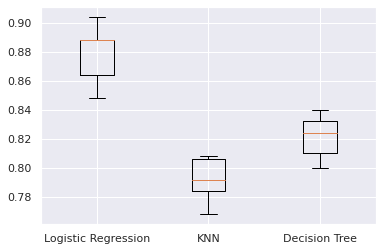

In [30]:
music = pd.read_csv('music_clean.csv').drop(columns='Unnamed: 0')
X = music.drop("genre", axis=1).values
y = music["genre"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {"Logistic Regression": LogisticRegression(max_iter=10000), "KNN": KNeighborsClassifier(), "Decision Tree": DecisionTreeClassifier()}
results = []
for model in models.values():
    kf = KFold(n_splits=6, random_state=42, shuffle=True)
    cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kf) # accuracy
    results.append(cv_results)

plt.boxplot(results, labels=models.keys())
plt.show()

# ***Test set performance***

In [31]:
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    test_score = model.score(X_test_scaled, y_test)
    print("{} Test Set Accuracy: {}".format(name, test_score))

Logistic Regression Test Set Accuracy: 0.82
KNN Test Set Accuracy: 0.784
Decision Tree Test Set Accuracy: 0.764


# ***Visualizing regression model performance***

Now you have seen how to evaluate multiple models out of the box, you will build three regression models to predict a song's `"energy"` levels.

The `music_df` dataset has had dummy variables for `"genre"` added. Also, feature and target arrays have been created, and these have been split into `X_train`, `X_test`, `y_train`, and `y_test`.

The following have been imported for you: `LinearRegression`, `Ridge`, `Lasso`, `cross_val_score`, and `KFold`.

* Write a `for` loop using model as the iterator, and `model.values()` as the iterable.

* Perform cross-validation on the training features and the training target array using the model, setting `cv` equal to the KFold object.

* Append the model's cross-validation scores to the results list.

* Create a box plot displaying the results, with the x-axis labels as the names of the models.

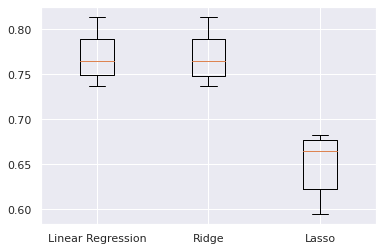

In [2]:
music = pd.read_csv('music_clean.csv').drop(columns='Unnamed: 0')
X = music.drop("energy", axis=1).values
y = music["energy"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

models = {"Linear Regression": LinearRegression(), "Ridge": Ridge(alpha=0.1), "Lasso": Lasso(alpha=0.1)}
results = []

# Loop through the models' values
for model in models.values():
    kf = KFold(n_splits=6, random_state=42, shuffle=True)
    
    # Perform cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=kf)
    
    # Append the results
    results.append(cv_scores)

# Create a box plot of the results
plt.boxplot(results, labels=models.keys())
plt.show()

Lasso regression is NOT a good model for this problem, while linear regression and ridge perform fairly equally. Let's make predictions on the test set, and see if the ***RMSE*** can guide us on model selection.

### ***Predicting on the test set***

In the last exercise, linear regression and ridge appeared to produce similar results. It would be appropriate to select either of those models; however, you can check predictive performance on the test set to see if either one can outperform the other.

You will use root mean squared error (RMSE) as the metric. The dictionary models, containing the names and instances of the two models, has been preloaded for you along with the training and target arrays `X_train_scaled`, `X_test_scaled`, `y_train`, and `y_test`.


* Import **`mean_squared_error`**.
* Fit the model to the scaled training data.
* Make predictions using the scaled test features.
* Calculate RMSE by passing the test set labels and the predicted labels.

In [3]:
music = pd.read_csv('music_clean.csv').drop(columns='Unnamed: 0')
X = music.drop("energy", axis=1).values
y = music["energy"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

from sklearn.metrics import mean_squared_error

for name, model in models.items():
    
    # Fit the model to the training dat
    model.fit(X_train_scaled, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test_scaled)
    
    # Calculate the test_rmse
    test_rmse = mean_squared_error(y_test, y_pred, squared=False)
    print("{} Test Set RMSE: {}".format(name, test_rmse))

Linear Regression Test Set RMSE: 0.11109818526605351
Ridge Test Set RMSE: 0.11110048128156672
Lasso Test Set RMSE: 0.17793986625718447


The linear regression model just edges the best performance, although the difference is a RMSE of 0.00001 for popularity! Now let's look at classification model selection.

### ***Visualizing classification model performance***

In this exercise, you will be solving a classification problem where the "popularity" column in the `music_df` dataset has been converted to binary values, with `1` representing popularity more than or equal to the median for the `"popularity"` column, and `0` indicating popularity below the `median`.

Your task is to build and visualize the results of three different models to classify whether a song is popular or not.

The data has been split, scaled, and preloaded for you as `X_train_scaled`, `X_test_scaled`, `y_train`, and `y_test`. Additionally, `KNeighborsClassifier`, `DecisionTreeClassifier`, and `LogisticRegression` have been imported.

* Create a dictionary of `"Logistic Regression"`, `"KNN"`, and `"Decision Tree Classifier"`, setting the dictionary's values to a call of each model.

* Loop through the values in models.

* Instantiate a `KFold` object to perform `6` splits, setting **`shuffle`** to `True` and **`random_state`** to `12`.

* Perform cross-validation using the `model`, the scaled training features, the target training set, and setting **`cv`** equal to `kf`.

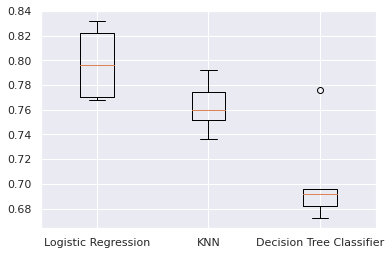

In [5]:
music = pd.read_csv('music_clean.csv').drop(columns='Unnamed: 0')
music['popularity'] = np.where(music["popularity"] >= np.median(music["popularity"]), 1, 0)
X = music.drop("popularity", axis=1).values
y = music["popularity"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create models dictionary
models = {"Logistic Regression": LogisticRegression(), "KNN": KNeighborsClassifier(), "Decision Tree Classifier": DecisionTreeClassifier()}
results = []

# Loop through the models' values
for model in models.values():
  
  # Instantiate a KFold object
  kf = KFold(n_splits=6, random_state=12, shuffle=True)
  
  # Perform cross-validation
  cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kf)
  results.append(cv_results)
plt.boxplot(results, labels=models.keys())
plt.show()

กราฟไม่เหมือนกันซะทีเดียว ไม่เป็นไร เพราะตรวจสอบข้อมูลแล้วก็มีความต่างกันเยอะอยู่

Looks like logistic regression is the best candidate based on the cross-validation results! Let's wrap up by building a pipeline

### ***Pipeline for predicting song popularity***

For the final exercise, you will build a pipeline to impute missing values, scale features, and perform hyperparameter tuning of a logistic regression model. The aim is to find the best parameters and accuracy when predicting song genre!

All the models and objects required to build the pipeline have been preloaded for you.

* Create the **`steps`** for the `pipeline` by calling a simple imputer, a standard scaler, and a logistic regression model.

* Create a pipeline object, and pass the **`steps`** variable.
* Instantiate a grid search object to perform cross-validation using the `pipeline` and the parameters.
* Print the best parameters and compute and print the test set accuracy score for the grid search object.

In [11]:
music = pd.read_csv('music_clean.csv').drop(columns='Unnamed: 0')
X = music.drop("genre", axis=1).values
y = music["genre"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create steps
steps = [("imp_mean", SimpleImputer()), 
         ("scaler", StandardScaler()), 
         ("logreg", LogisticRegression(max_iter=10000))]

# Set up pipeline
pipeline = Pipeline(steps)
params = {"logreg__solver": ["newton-cg", "saga", "lbfgs"],
         "logreg__C": np.linspace(0.001, 1.0, 10)}

# Create the GridSearchCV object
tuning = GridSearchCV(pipeline, param_grid=params)
tuning.fit(X_train, y_train)
y_pred = tuning.predict(X_test)

# Compute and print performance
print("Tuned Logistic Regression Parameters: {}, Accuracy: {}".format(tuning.best_params_, tuning.score(X_test, y_test)))

Tuned Logistic Regression Parameters: {'logreg__C': 1.0, 'logreg__solver': 'newton-cg'}, Accuracy: 0.82


You've selected a model, built a preprocessing pipeline, and performed hyperparameter tuning to create a model that is 82% accurate in predicting song genres!